In [3]:
from __future__ import print_function, division
%run basics.ipynb

Populating the interactive namespace from numpy and matplotlib


/opt/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['show_config']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Loading BokehJS ...

Using Theano backend.


In [19]:
out_folder = 'basic_data_stat/'
if not os.path.isdir(out_folder):
    os.makedirs(out_folder)

In [5]:
df = pd.read_csv('data/auto_tagging.csv')
df['tag'] = df['tag'].apply(lambda x: ' '.join(x.split(' | ')))
display(df.head(2))

print(df.columns)
print(df.count()/len(df)*100)

,id,description,title,subtitle,tag,syllabus,fold_num
0,http://videolectures.net/acml2013_herbrich_rea...,The last ten years have seen a tremendous grow...,"Distributed, Real-Time Bayesian Learning in On...",NaN,machine_learning video in_depth,NaN,2
1,http://videolectures.net/acml2013_lin_cost_sen...,Classification is an important problem in mach...,Cost-sensitive Classification: Algorithms and ...,NaN,machine_learning video in_depth,NaN,2


Index([u'id', u'description', u'title', u'subtitle', u'tag', u'syllabus',
       u'fold_num'],
      dtype='object')
id             100.000000
description     83.535109
title           99.757869
subtitle        28.087167
tag            100.000000
syllabus        11.138015
fold_num       100.000000
dtype: float64


In [7]:
df['venue'] = df['id'].apply(lambda x: x.split('/', 3)[2])
df['venue'].head(5)

0    videolectures.net
1    videolectures.net
2    videolectures.net
3    videolectures.net
4    videolectures.net
Name: venue, dtype: object

In [8]:
desc_len = df[['venue', 'description']]

In [27]:
desc_len['# words'] = desc_len['description'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0.)
desc_len_all = desc_len.copy()
desc_len_all['venue'] = 'all venues'

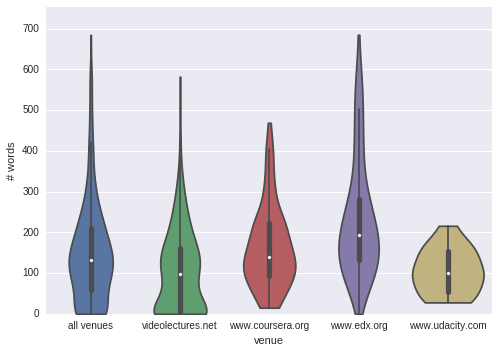

In [28]:
sns.violinplot(x='venue', y='# words', data=pd.concat([desc_len_all, desc_len]) , cut=0)
plt.ylim([0., desc_len['# words'].max() * 1.1])
plt.savefig(out_folder + 'resource_word_len.png', dpi=150)
plt.show()